<h1 style="text-align: center; font-weight: bold;">Individual Planning Report</h1>

### Data Description

In [1]:
#First, load the packages
library(tidymodels)
library(tidyverse)
library(dplyr)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_co

In [15]:
#Since the CSV files of the source for the datasets are uploaded in the GitHub repository, we will read the data from it.
players <- read_csv("https://raw.githubusercontent.com/HollieHuang666/Dsci-100-Individual-Planning-Report/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The dataframe has 196 rows and 7 columns, so there are also 196 objects as players and 7 variables. 

<table>
  <caption><strong>Player Data: Variables & Descriptions</strong></caption>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>experience</code></td>
      <td>character</td>
      <td>Player skill level: beginner, regular, amateur, veteran, or pro.</td>
    </tr>
    <tr>
      <td><code>subscribe</code></td>
      <td>logical</td>
      <td>Whether the player subscribed to the game newsletter (TRUE/FALSE).</td>
    </tr>
    <tr>
      <td><code>hashedEmail</code></td>
      <td>character</td>
      <td>Hashed email identifier (stored for privacy).</td>
    </tr>
    <tr>
      <td><code>played_hours</code></td>
      <td>double</td>
      <td>Total hours the player has played.</td>
    </tr>
    <tr>
      <td><code>name</code></td>
      <td>character</td>
      <td>Player's name.</td>
    </tr>
    <tr>
      <td><code>gender</code></td>
      <td>character</td>
      <td>Player's gender.</td>
    </tr>
    <tr>
      <td><code>Age</code></td>
      <td>double</td>
      <td>Player's age.</td>
    </tr>
  </tbody>
</table>


In [3]:
stats_played_hours <- tibble(
  played_hours_min = min(pull(players, played_hours)),
  played_hours_max = max(pull(players, played_hours)),
  played_hours_mean = mean(pull(players, played_hours)),
  played_hours_sd = sd(pull(players, played_hours)),
  played_hours_median = median(pull(players, played_hours))
)
stats_played_hours

stats_age <- tibble(
  age_min = min(pull(players, Age), na.rm = TRUE),
  age_max = max(pull(players, Age), na.rm = TRUE),
  age_mean = mean(pull(players, Age), na.rm = TRUE),
  age_sd = sd(pull(players, Age), na.rm = TRUE),
  age_median = median(pull(players, Age), na.rm = TRUE)
)
stats_age

played_hours_min,played_hours_max,played_hours_mean,played_hours_sd,played_hours_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.845918,28.35734,0.1


age_min,age_max,age_mean,age_sd,age_median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,7.389687,19


For the numeric variables of `played_hours` and `Age`, looking at the created tables above, `played_hours` ranges from 0 to 223.1, with a mean of 5.85, a median of 0.1, and a standard deviation of 28.36; `Age` ranges from 9 to 58, with a mean of 21.14, a median of 19 and a standard deviation of 7.39.

The data has several issues to consider. First, there are missing values in the Age and gender columns that will need to be addressed during analysis. Additionally, there may be sampling bias: the sample appears to be skewed toward younger male players with relatively low play hours. This imbalance may limit the generalizability of our findings to other groups, such as older players, different genders, or individuals with higher gaming engagement.

The `name`, `gender`, `Age`, and `experience` variables were likely entered manually by users, although this cannot be confirmed from the information provided. In contrast, played_hours appears to be system-generated, as it represents the total play time added from all gameplay sessions in the sessions.csv file that will be loaded next.

In [13]:
#Now read the sessions.csv from GitHub repository
sessions <- read_csv("https://raw.githubusercontent.com/HollieHuang666/Dsci-100-Individual-Planning-Report/refs/heads/main/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


For the sessions dataframe, there are 1535 rows and 5 columns, so there are 1535 people as observations and a total of 5 variables.

<table>
  <caption><strong>Sessions Data: Variables & Descriptions</strong></caption>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>hashedEmail</code></td>
      <td>character</td>
      <td>Hashed email identifier (stored for privacy).</td>
    </tr>
    <tr>
      <td><code>start_time</code></td>
      <td>character</td>
      <td>Date and time of the day when the player starts playing converted from <code>original_start_time</code>.</td>
    </tr>
    <tr>
      <td><code>end_time</code></td>
      <td>character</td>
      <td>Date and time of the day when the player ends playing from <code>original_end_time</code>.</td>
    </tr>
    <tr>
      <td><code>original_start_time</code></td>
      <td>double</td>
      <td>Start time recorded in UNIX time as original data.</td>
    </tr>
    <tr>
      <td><code>original_end_time</code></td>
      <td>character</td>
      <td>End time recorded in UNIX time as original data.</td>
    </tr>
  </tbody>
</table>

For the sessions dataframe, one row is missing a value for original_end_time, and consequently for end_time as well. This should be addressed during the data cleaning or computation stage. Although the exact data collection method is unclear, it is likely that each record was generated when a player entered and exited the game.

### Broad Question: 
<em> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? </em>

### Specific Question: 
<em>Can experience, age, and played hours predict number of subscription? </em>

For this question, `Gender` will be excluded from the predictive model to prevent the introduction of potential gender bias or ethical complications in the analysis.

For wrangling:
* remove NA values
* simplifying the dataframe by dropping `hashedEmail` and `name`
* convert `experience` and `subscribe` as a factor

### Data Wrangling

In [5]:
players_wrangled <- players |>
    select(-hashedEmail,-name, -gender) |>
    mutate(experience = as_factor(experience),
           subscribe = as_factor(subscribe)) |>
    drop_na()
glimpse(players_wrangled)

Rows: 194
Columns: 4
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


### Visualization

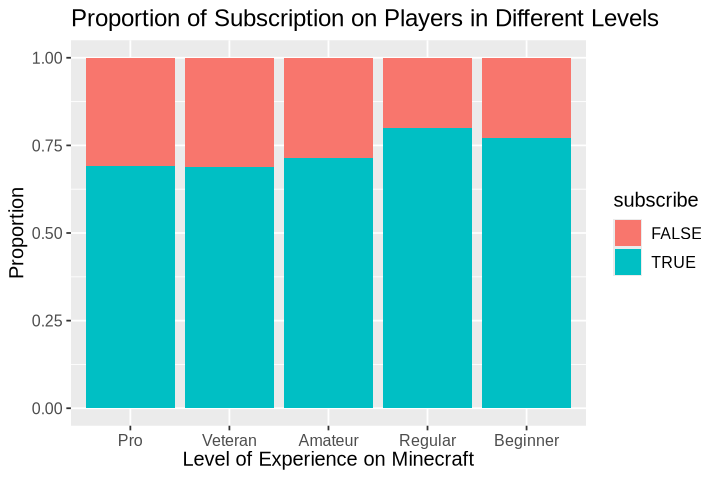

In [6]:
#create a barplot for experience
options(repr.plot.width = 6, repr.plot.height = 4)
bar_experience <- ggplot(players_wrangled, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Level of Experience on Minecraft",
         y = "Proportion",
         title = "Proportion of Subscription on Players in Different Levels") +
    theme(text = element_text(size = 12))
bar_experience

The bar chart displays subscription rates across different experience levels. Overall, approximately 70% of players subscribe, and the proportions remain relatively consistent across experience categories. This suggests that experience is not a strong predictor of subscription status. As a result, since this predictor is categorical and not as influential, we will exclude it as a predictor to achieve the best result based on our current level of knowledge. Thus, the <strong> specific question</strong> becomes:  <em> Can age and played hours predict the number of subscriptions? </em>

In [7]:
#Thus, remove the experience column.
players_wrangled <- select(players_wrangled, -experience)

In [8]:
glimpse(players_wrangled)

Rows: 194
Columns: 3
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


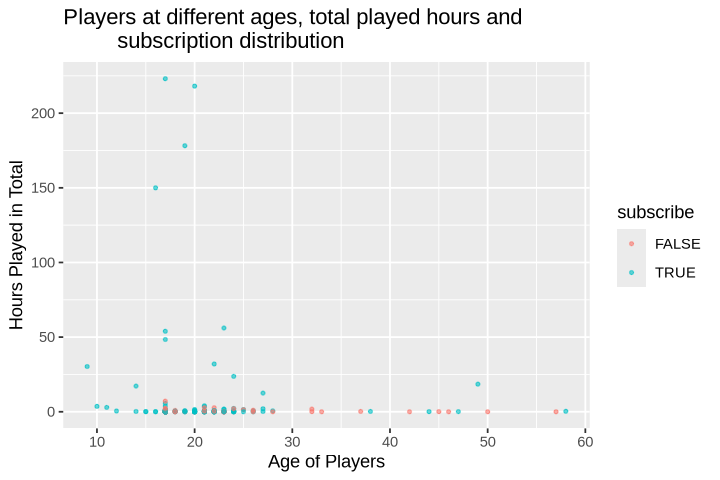

In [9]:
#Draw the age and played_hours scatter plot
age_hours <- ggplot(players_wrangled, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.6, size = 0.8) +
    labs(x = "Age of Players",
         y = "Hours Played in Total",
         title = "Players at different ages, total played hours and 
         subscription distribution") +
    theme(element_text(size = 12))
age_hours

The analysis reveals no clear relationship between played hours and age, with the player base predominantly consisting of younger individuals. Subscription rates are generally higher among younger players, while middle-aged players show a greater tendency not to subscribe. However, the limited representation of older players in the dataset prevents reliable conclusions for that demographic.

### Methods and Plan
* I will use KNN classification to predict subscription status, as it suits our categorical response variable.
* The model assumes age and played hours actually relate to subscription decisions, and without this relationship, performance may suffer.
* Key limitations include computational demands with large data and sensitivity to predictor scales, necessitating standardization.
* Using a 75-25 train-test split, I will perform 5-fold cross-validation to identify the optimal k value while ensuring proper preprocessing through a standardized recipe.